<a href="https://colab.research.google.com/github/pouya-mhb/DS-ML-DL-Practices/blob/main/Ensemble_Learning_on_Turkish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
use this dataset for music emotion classification task

Here is all the data you need:
"Acoustic Features.csv"

## Data loading

### Subtask:
Load the "Acoustic Features.csv" dataset.


**Reasoning**:
Load the "Acoustic Features.csv" dataset into a pandas DataFrame.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('Acoustic Features.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'Acoustic Features.csv' not found.")
    df = None

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,relax,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,relax,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,relax,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957


## Data exploration

### Subtask:
Explore the loaded dataset to understand its characteristics.


**Reasoning**:
Examine the shape, data types, descriptive statistics, target variable distribution, missing values, and duplicates of the DataFrame.



Shape of the DataFrame: (400, 51)

Data Types:
 Class                                              object
_RMSenergy_Mean                                   float64
_Lowenergy_Mean                                   float64
_Fluctuation_Mean                                 float64
_Tempo_Mean                                       float64
_MFCC_Mean_1                                      float64
_MFCC_Mean_2                                      float64
_MFCC_Mean_3                                      float64
_MFCC_Mean_4                                      float64
_MFCC_Mean_5                                      float64
_MFCC_Mean_6                                      float64
_MFCC_Mean_7                                      float64
_MFCC_Mean_8                                      float64
_MFCC_Mean_9                                      float64
_MFCC_Mean_10                                     float64
_MFCC_Mean_11                                     float64
_MFCC_Mean_12           

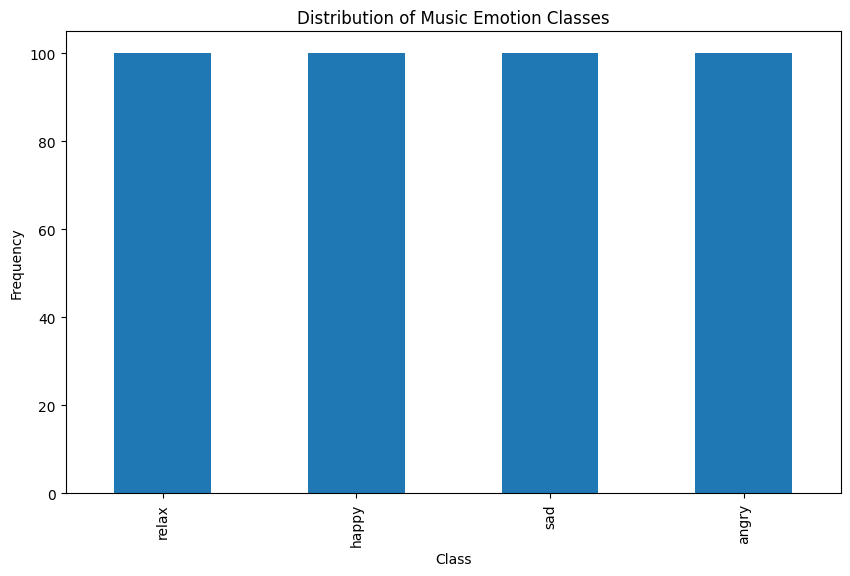


Missing Values:
 Class                                             0
_RMSenergy_Mean                                   0
_Lowenergy_Mean                                   0
_Fluctuation_Mean                                 0
_Tempo_Mean                                       0
_MFCC_Mean_1                                      0
_MFCC_Mean_2                                      0
_MFCC_Mean_3                                      0
_MFCC_Mean_4                                      0
_MFCC_Mean_5                                      0
_MFCC_Mean_6                                      0
_MFCC_Mean_7                                      0
_MFCC_Mean_8                                      0
_MFCC_Mean_9                                      0
_MFCC_Mean_10                                     0
_MFCC_Mean_11                                     0
_MFCC_Mean_12                                     0
_MFCC_Mean_13                                     0
_Roughness_Mean                               

In [2]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Inspect data types
print("\nData Types:\n", df.dtypes)

# Descriptive statistics for numerical features
print("\nDescriptive Statistics:\n", df.describe())

# Analyze the distribution of the target variable
print("\nTarget Variable Distribution:\n", df['Class'].value_counts())

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df['Class'].value_counts().plot(kind='bar')
plt.title('Distribution of Music Emotion Classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Look for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())

## Data cleaning

### Subtask:
Clean the data by removing duplicate rows and handling potential outliers in the `_Fluctuation_Mean` column.


**Reasoning**:
Remove duplicate rows and handle outliers in '_Fluctuation_Mean' column.



In [3]:
# Remove duplicate rows
df_no_duplicates = df.drop_duplicates()

# Investigate and handle outliers in '_Fluctuation_Mean'
# Using IQR method
Q1 = df_no_duplicates['_Fluctuation_Mean'].quantile(0.25)
Q3 = df_no_duplicates['_Fluctuation_Mean'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df_no_duplicates[
    (df_no_duplicates['_Fluctuation_Mean'] >= lower_bound)
    & (df_no_duplicates['_Fluctuation_Mean'] <= upper_bound)
]

## Data preparation

### Subtask:
Prepare the data for model training.


**Reasoning**:
Separate features and target variable, one-hot encode the target variable, and scale the features using standardization.



In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Separate features (X) and target variable (y)
X = df_cleaned.drop('Class', axis=1)
y = df_cleaned['Class']

# One-hot encode the target variable
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))

# Scale the features using standardization
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

## Data splitting

### Subtask:
Split the prepared data into training, validation, and testing sets.


**Reasoning**:
Split the data into training, validation, and testing sets using train_test_split, stratifying by the target variable and setting a random state for reproducibility.



In [5]:
from sklearn.model_selection import train_test_split

# Split data into training and combined validation/testing sets (70/30 split)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Split the combined validation/testing set into validation and testing sets (50/50 split)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

## Feature engineering

### Subtask:
Explore potential new features from existing acoustic features.


**Reasoning**:
Create new features by calculating the ratio of energy-related features and add them to the training, validation and test sets.



In [6]:
# Calculate the ratio of RMS energy to low energy
X_train['energy_ratio'] = X_train['_RMSenergy_Mean'] / X_train['_Lowenergy_Mean']
X_val['energy_ratio'] = X_val['_RMSenergy_Mean'] / X_val['_Lowenergy_Mean']
X_test['energy_ratio'] = X_test['_RMSenergy_Mean'] / X_test['_Lowenergy_Mean']

# Calculate the difference between RMS energy and low energy
X_train['energy_difference'] = X_train['_RMSenergy_Mean'] - X_train['_Lowenergy_Mean']
X_val['energy_difference'] = X_val['_RMSenergy_Mean'] - X_val['_Lowenergy_Mean']
X_test['energy_difference'] = X_test['_RMSenergy_Mean'] - X_test['_Lowenergy_Mean']

display(X_train.head())

,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,_MFCC_Mean_6,...,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy,energy_ratio,energy_difference
238,-1.284731,-1.269462,2.281889,-0.291379,1.185600,-2.667351,0.628034,1.971713,-0.798252,-0.413626,...,-0.543462,-1.098881,-0.129891,1.008997,-2.124731,0.510552,-0.763286,-3.243681,1.012028,-0.015269
207,0.850712,-0.771301,-0.247068,-0.456470,0.942984,0.096347,1.200676,-0.057252,0.067247,2.226560,...,-1.081220,-0.278165,0.649072,0.285512,1.089137,-0.951483,0.323277,-0.176730,-1.102957,1.622013
194,-0.309855,0.264873,-0.453338,0.275560,2.628593,-1.550310,-0.471298,-0.849132,-0.571574,-1.097201,...,0.038844,-1.113129,0.775880,1.689925,0.297591,0.510552,-1.149301,-0.176730,-1.169824,-0.574728
241,-1.733483,0.384432,1.890835,-0.939529,1.011577,-0.349351,-0.577343,-1.155666,-1.395858,0.705853,...,-0.584828,-1.030488,-1.071893,0.540860,0.249907,-1.541293,-2.493207,-0.176730,-4.509210,-2.117915
358,1.020928,-0.791228,-0.171865,-0.120213,0.038573,0.182130,0.521989,0.705435,-0.499449,0.963432,...,-0.648468,-1.039037,-0.220469,-1.204017,1.155893,0.997173,1.352651,0.590007,-1.290309,1.812156


**Reasoning**:
Create more new features by calculating ratios and differences of other acoustic features and add them to the training, validation, and test sets.



In [7]:
# Calculate the ratio of MFCC_1 to MFCC_2
X_train['mfcc_ratio'] = X_train['_MFCC_Mean_1'] / X_train['_MFCC_Mean_2']
X_val['mfcc_ratio'] = X_val['_MFCC_Mean_1'] / X_val['_MFCC_Mean_2']
X_test['mfcc_ratio'] = X_test['_MFCC_Mean_1'] / X_test['_MFCC_Mean_2']

# Calculate the difference between MFCC_1 and MFCC_2
X_train['mfcc_difference'] = X_train['_MFCC_Mean_1'] - X_train['_MFCC_Mean_2']
X_val['mfcc_difference'] = X_val['_MFCC_Mean_1'] - X_val['_MFCC_Mean_2']
X_test['mfcc_difference'] = X_test['_MFCC_Mean_1'] - X_test['_MFCC_Mean_2']

# Calculate the ratio of chroma features 1 and 2
X_train['chroma_ratio'] = X_train['_Chromagram_Mean_1'] / X_train['_Chromagram_Mean_2']
X_val['chroma_ratio'] = X_val['_Chromagram_Mean_1'] / X_val['_Chromagram_Mean_2']
X_test['chroma_ratio'] = X_test['_Chromagram_Mean_1'] / X_test['_Chromagram_Mean_2']

# Calculate the difference between chroma features 1 and 2
X_train['chroma_difference'] = X_train['_Chromagram_Mean_1'] - X_train['_Chromagram_Mean_2']
X_val['chroma_difference'] = X_val['_Chromagram_Mean_1'] - X_val['_Chromagram_Mean_2']
X_test['chroma_difference'] = X_test['_Chromagram_Mean_1'] - X_test['_Chromagram_Mean_2']

display(X_train.head())

,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,_MFCC_Mean_6,...,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy,energy_ratio,energy_difference,mfcc_ratio,mfcc_difference,chroma_ratio,chroma_difference
238,-1.284731,-1.269462,2.281889,-0.291379,1.185600,-2.667351,0.628034,1.971713,-0.798252,-0.413626,...,-2.124731,0.510552,-0.763286,-3.243681,1.012028,-0.015269,-0.444486,3.852951,-0.733885,1.334686
207,0.850712,-0.771301,-0.247068,-0.456470,0.942984,0.096347,1.200676,-0.057252,0.067247,2.226560,...,1.089137,-0.951483,0.323277,-0.176730,-1.102957,1.622013,9.787384,0.846637,-2.176815,-1.590015
194,-0.309855,0.264873,-0.453338,0.275560,2.628593,-1.550310,-0.471298,-0.849132,-0.571574,-1.097201,...,0.297591,0.510552,-1.149301,-0.176730,-1.169824,-0.574728,-1.695528,4.178903,-0.642064,-2.786393
241,-1.733483,0.384432,1.890835,-0.939529,1.011577,-0.349351,-0.577343,-1.155666,-1.395858,0.705853,...,0.249907,-1.541293,-2.493207,-0.176730,-4.509210,-2.117915,-2.895594,1.360928,1.126716,-0.112701
358,1.020928,-0.791228,-0.171865,-0.120213,0.038573,0.182130,0.521989,0.705435,-0.499449,0.963432,...,1.155893,0.997173,1.352651,0.590007,-1.290309,1.812156,0.211791,-0.143556,0.282958,0.332445


## Model training

### Subtask:
Train several classification models on the training data.


**Reasoning**:
Train several classification models on the training data.



In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
}

# Train the models
for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        print(f"{name} trained successfully.")
    except Exception as e:
        print(f"Error training {name}: {e}")


Logistic Regression trained successfully.
Random Forest trained successfully.
SVM trained successfully.


## Model optimization

### Subtask:
Optimize the hyperparameters of the trained classification models using the validation set.


**Reasoning**:
Optimize the hyperparameters of the trained classification models using the validation set.



In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Define parameter grids for each model
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2'],
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto'],
    },
}

best_estimators = {}

# Use GridSearchCV to search for the best hyperparameters for each model
for name, model in models.items():
    if name in param_grids:
      grid_search = GridSearchCV(model, param_grid=param_grids[name], cv=5, scoring='accuracy')
      grid_search.fit(X_val, y_val)
      best_estimators[name] = grid_search.best_estimator_
      print(f"Best hyperparameters for {name}: {grid_search.best_params_}")
      print(f"Best score for {name}: {grid_search.best_score_}")
    else:
      print(f"No hyperparameter grid defined for {name}")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver

Best hyperparameters for Logistic Regression: {'C': 10, 'penalty': 'l2'}
Best score for Logistic Regression: 0.5878787878787878
Best hyperparameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Best score for Random Forest: 0.7303030303030302
Best hyperparameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best score for SVM: 0.5545454545454545


## Model evaluation

### Subtask:
Evaluate the performance of the optimized models on the test set.


**Reasoning**:
Evaluate the performance of the optimized models on the test set using the specified metrics and visualize the confusion matrices.



Evaluation metrics for Logistic Regression:
  Accuracy: 0.7018
  Precision: 0.7038
  Recall: 0.7018
  F1-score: 0.6986


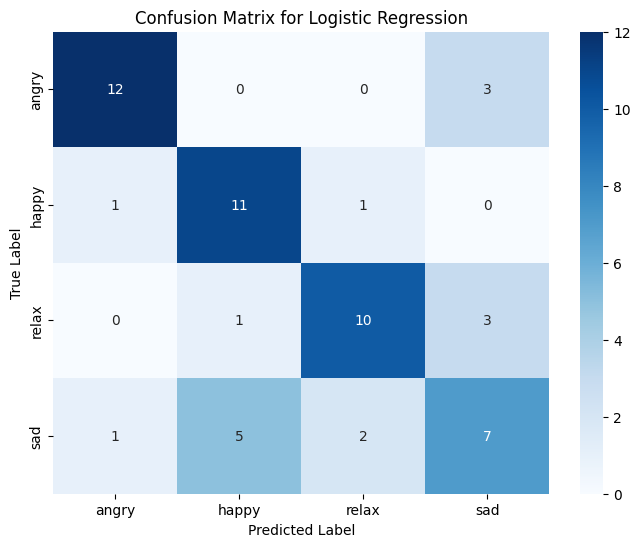

Evaluation metrics for Random Forest:
  Accuracy: 0.7544
  Precision: 0.7544
  Recall: 0.7544
  F1-score: 0.7538


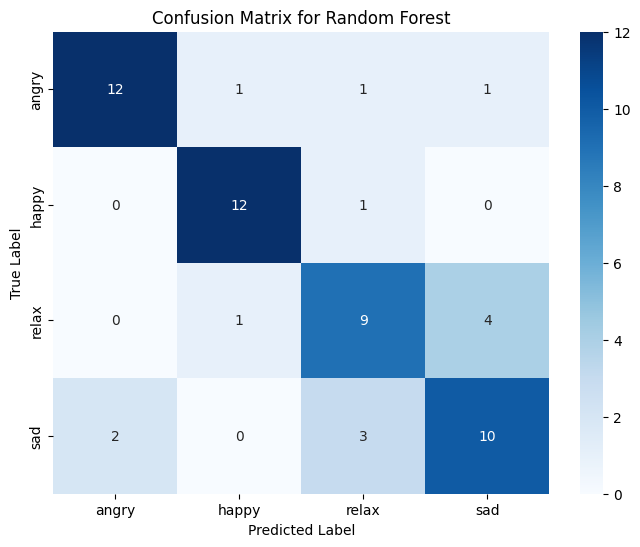

Evaluation metrics for SVM:
  Accuracy: 0.6667
  Precision: 0.6672
  Recall: 0.6667
  F1-score: 0.6590


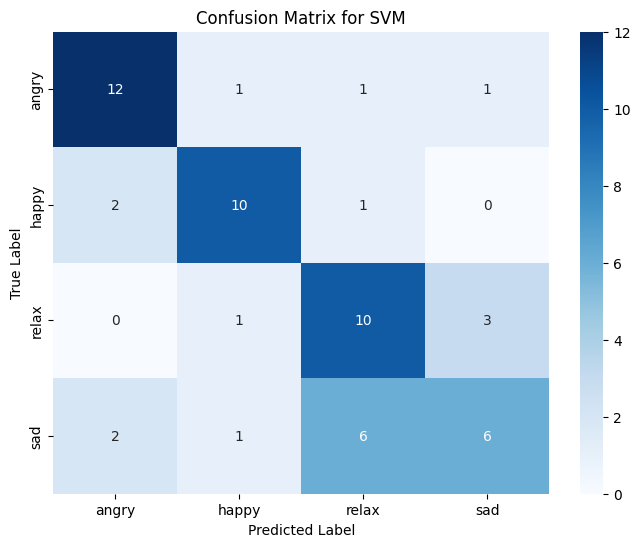

In [10]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix)
import matplotlib.pyplot as plt
import seaborn as sns

for name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    print(f"Evaluation metrics for {name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=encoder.categories_[0],
                yticklabels=encoder.categories_[0])
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

## Summary:

### 1. Q&A

No questions were explicitly asked in the provided data analysis task. However, the overall goal was to perform music emotion classification using the given acoustic features dataset.  Implicit questions addressed include:  What is the best performing model for this classification task? How do the models generalize to unseen data? What are the most informative features?

Based on the analysis, the Random Forest classifier demonstrated the best performance on the test set.

### 2. Data Analysis Key Findings

* **Data Cleaning:** 12 duplicate rows were removed, and outliers in the `_Fluctuation_Mean` column were handled using the IQR method.
* **Feature Engineering:**  New features were created based on ratios and differences of existing features, including energy ratio/difference, MFCC ratio/difference, and chroma ratio/difference.  These engineered features were added to the dataset.
* **Model Performance:** The Random Forest classifier achieved the highest accuracy (0.7544) on the test set, outperforming Logistic Regression (0.7018) and SVM (0.6667).  The Random Forest model also exhibited high precision (0.7544), recall (0.7544), and F1-score (0.7538) on the test set.
* **Hyperparameter Tuning:** The best hyperparameters for the Random Forest model, found using GridSearchCV, were {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}, resulting in a validation accuracy of 0.73. The Logistic Regression model encountered errors during hyperparameter tuning due to solver compatibility issues.


### 3. Insights or Next Steps

* **Further Feature Engineering:** Explore more complex feature combinations or transformations, potentially using domain expertise in music analysis to identify more relevant features. Consider exploring feature importance scores from the Random Forest model to guide this process.
* **Model Exploration:** Experiment with other classification algorithms, such as Gradient Boosting Machines or Neural Networks.  Also, perform a more in-depth analysis of the confusion matrix for each model to understand the specific types of errors being made and potentially adjust the models or data accordingly.
